# Contours

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img=cv2.imread("tomato.jpeg",0)

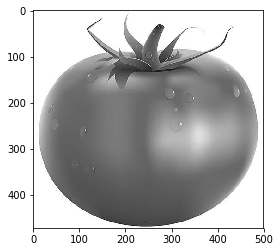

In [3]:
plt.imshow(img,"gray")

In [4]:
ret,thresh=cv2.threshold(img,127,255,0)

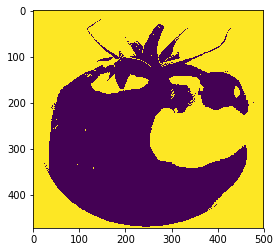

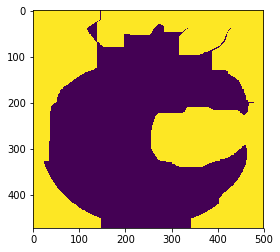

In [5]:
plt.imshow(thresh)
kernel = np.ones((5,5),np.uint8)
thresh=cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel,iterations=10)
plt.figure()
plt.imshow(thresh)

In [6]:
contours,_=cv2.findContours(thresh,0,2)

In [7]:
cnt=contours[0]

In [8]:
M=cv2.moments(cnt)

In [9]:
print(M)

{'m00': 111949.0, 'm10': 30323408.5, 'm01': 22488501.5, 'm20': 11613130960.666666, 'm11': 6340011558.0, 'm02': 6980276864.333333, 'm30': 4819004360721.851, 'm21': 2523383032773.2, 'm12': 1964771132097.0332, 'm03': 2504270773666.35, 'mu20': 3399488113.853634, 'mu11': 248594774.1308918, 'mu02': 2462749242.688636, 'mu30': -168247402302.82227, 'mu21': 55845182479.572876, 'mu12': -25839187799.957397, 'mu03': 112618799904.81592, 'nu20': 0.27125208802459705, 'nu11': 0.01983588390269947, 'nu02': 0.19650778352127213, 'nu30': -0.040123408666300514, 'nu21': 0.013317882166400863, 'nu12': -0.006162093901675569, 'nu03': 0.026857176219317217}


In [10]:
cx=int(M['m10']/M["m00"])
cy=int(M["m01"]/M["m00"])

In [11]:
cx,cy

(270, 200)

In [12]:
area=cv2.contourArea(cnt)

In [13]:
perimeter=cv2.arcLength(cnt,True)

In [14]:
len(contours)

1

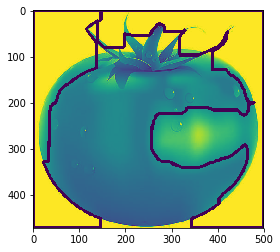

In [15]:
cv2.drawContours(img,contours,-1,(0,255,0),5)
plt.imshow(img)

In [16]:
contours

[array([[[  0,   0]],
 
        [[  0, 471]],
 
        [[146, 471]],
 
        ...,
 
        [[146,  21]],
 
        [[145,  20]],
 
        [[145,   0]]], dtype=int32)]

In [17]:
epsilon=0.01*cv2.arcLength(cnt,True)

In [18]:
approx=cv2.approxPolyDP(cnt,epsilon,True)

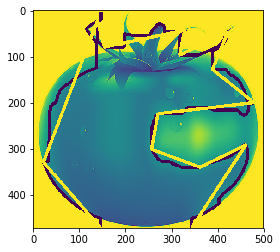

In [19]:
cv2.drawContours(img,[approx],-1,(255,0,0),5)
plt.imshow(img)

In [20]:
len(approx)

18

In [21]:
contours

[array([[[  0,   0]],
 
        [[  0, 471]],
 
        [[146, 471]],
 
        ...,
 
        [[146,  21]],
 
        [[145,  20]],
 
        [[145,   0]]], dtype=int32)]

In [22]:
cv2.__version__

'4.1.0'

In [23]:
x,y,w,h=cv2.boundingRect(cnt)
aspect_ratio=float(w)/h

In [24]:
help(cv2.findContours)

Help on built-in function findContours:

findContours(...)
    findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
    .   @brief Finds contours in a binary image.
    .   
    .   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
    .   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
    .   OpenCV sample directory.
    .   @note Since opencv 3.2 source image is not modified by this function.
    .   
    .   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
    .   pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold ,
    .   #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one.
    .   If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
    .   @p

In [25]:
cnt

array([[[  0,   0]],

       [[  0, 471]],

       [[146, 471]],

       ...,

       [[146,  21]],

       [[145,  20]],

       [[145,   0]]], dtype=int32)

In [26]:
mask=np.zeros(img.shape,np.uint8)

In [27]:
cv2.drawContours(mask,[cnt],0,255,-5)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

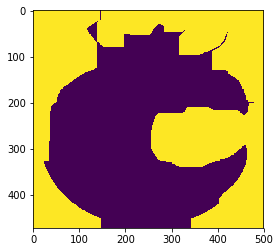

In [28]:
plt.imshow(mask)

In [29]:
pixelpoints=np.transpose(np.nonzero(mask))

In [30]:
pixelpoints

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [471, 497],
       [471, 498],
       [471, 499]], dtype=int64)

In [31]:
hull=cv2.convexHull(cnt,returnPoints=False)

In [32]:
detefects=cv2.convexityDefects(cnt,hull)

In [33]:
cnt

array([[[  0,   0]],

       [[  0, 471]],

       [[146, 471]],

       ...,

       [[146,  21]],

       [[145,  20]],

       [[145,   0]]], dtype=int32)

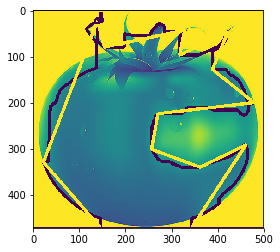

In [34]:
for i in range(detefects.shape[0]):
    
    s,e,f,d=detefects[i,0]
    start=tuple(cnt[s][0])
    end=tuple(cnt[e][0])
    far=tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],3)
    cv2.circle(img,far,5,[0,0,255],3)
   
    plt.imshow(img)

In [35]:
start

(0, 471)

In [36]:
img=cv2.imread('star.jpg')
img=cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_CONSTANT,value=[247, 247, 247])

In [37]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

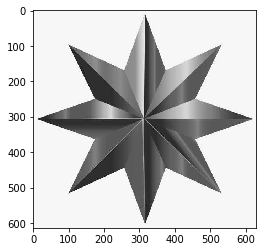

In [38]:
plt.imshow(img_gray,'gray')

In [39]:
ret,thresh=cv2.threshold(img_gray,200,255,0)

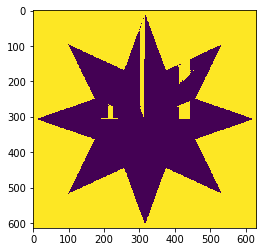

In [40]:
plt.imshow(thresh)

In [41]:
kernel = np.ones((5,5),np.uint8)
thresh=cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel,iterations=3)

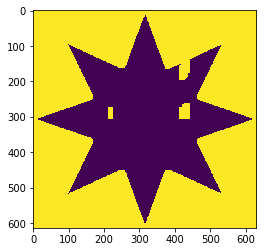

In [42]:
plt.imshow(thresh)

In [43]:
contours,hierarchy=cv2.findContours(thresh,2,1)

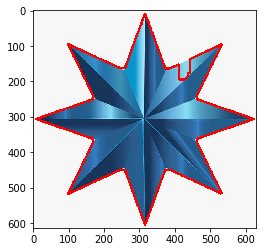

In [44]:
'''
area=0
for cntI in contours:
    areaI = cv2.contourArea(cntI)
    if areaI>area:
        cnt=cntI
        area=areaI    
    '''
cnt=contours[5]
cv2.drawContours(img,cnt,-1,[255,0,0],5)
plt.imshow(img)

In [45]:
hull=cv2.convexHull(cnt,returnPoints=False)

In [46]:
defects=cv2.convexityDefects(cnt,hull)

In [47]:
for i in range(defects.shape[0]):
    s,e,f,d=defects[i,0]
    start=tuple(cnt[s][0])
    end=tuple(cnt[e][0])
    far=tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],10)
    cv2.circle(img,far,10,[255,0,255],-1)

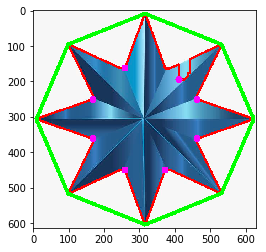

In [48]:
plt.imshow(img)